## <font color = 'orange'>What is Recommendation System?</font>
- **Recommender systems are the systems that are designed to recommend things to the user** based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them. 
- Companies using recommender systems focus on increasing sales as a result of very personalized offers and an enhanced customer experience. Recommendations typically speed up searches and make it easier for users to access content they’re interested in, and surprise them with offers they would have never searched for.

## <font color = 'orange'>Content based Recommendation System</font>
**Content** here refers to the content or attribute of the products you like. So the idea in this system is to tag the products with certain keywords, understand what the user like, look up to those keywords in database and recommend the products with same attribute. Also some features are more important then others. This suggest that the system should assign weights to the features. 

#### Drawback
The recommendation in a content-based system is based on user's taste and the content or feature set items. Such a model is very efficient. However, in some cases, it doesn't work. For example, assume that we have a movie in the drama genre, which the user has never watch. So, this genre would not be in her profile. Therefore, `shall only get recommendations related to genres that are already in her profile and the recommender engine may never recommend any movie within other genres`. This problem can be solved by other types of recommender systems such as collaborative filtering.

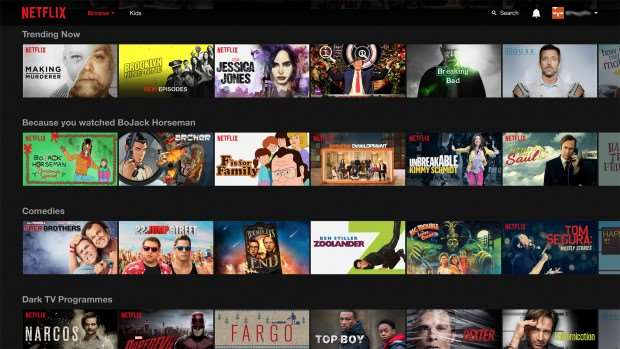

### <font color = 'orange'>Other types of Recommendation System</font>
1. `Collaborative filtering based recommendation system` : The simple idea behind this system is that similar user tend to like similar items. It is based on the assumption that if some users have had similar interest in the past, they will have similar interest in the future. The main advantage of this system is that you do not need to know the content in the detail. 
    1. `User based`: To summarise the algorithm of user-based filters:
        1. Find users similar to the user 'x' (called the peer users) for whom predictions are to be made using any similarity measure like the correlation coefficient.
        2. For each movie 'm' that the user has not seen, calculate the weighted average of the ratings given to 'm' by the peer users.
        3. Recommend the top 'n' movies to the user 'x'.
    2. `Item based` : To reiterate the item-based filtering procedure, the following steps are followed in sequence to predict the rating a user 'x' will give to a movie 'm':
        1. Find items similar to the movie 'm' (often called peer group of items) using a similarity measure like cosine. 
        2. Calculate the rating that the user will give to the movie 'm' using the weighted average of the ratings given to the nearest movies by the user.
        3. Recommend the top-n movies to the user.
2. `Hybrid recommendation system` : Combining any of the two systems in a manner that suits a particular industry is known as Hybrid Recommender system. This is the most sought after Recommender system that many companies look after, as it combines the strengths of more than two Recommender system and also eliminates any weakness which exist when only one recommender system is used.

#### Further Readings
- An introduction to recommendation engines, [here](http://dataconomy.com/2015/03/an-introduction-to-recommendation-engines/)
- Types of recommendation system, [here](https://www.bluepiit.com/blog/classifying-recommender-systems/)
- How Netflix implements its recommendation engine in their two-part blog, [here](https://netflixtechblog.com/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429)
- What's difference between item-based and content-based collaborative filtering? [here](https://stackoverflow.com/questions/16372191/whats-difference-between-item-based-and-content-based-collaborative-filtering)

---
## <font color = 'orange'>Topics Covered in this notebook</font>
### Content-based Recommendation
>Cleaning and Graph
>>Model Building for single user
>>>Generalised function

---
# <font color = 'blue'>Cleaning

In [ ]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading movies file

movies = pd.read_csv('/kaggle/input/movielens-latest-small/movies.csv', encoding='latin-1')
movies.head()

In [ ]:
print('Shape:', movies.shape)
print('Movie ids:', movies.movieId.nunique())
print('Titles:', movies.title.nunique())

It is been oberved that there is a `mismatch between unique movieids and unique title`.<br>
There are 5 more ids than the movies i.e. **there is 5 such movies who has stored in this table with two different ids**.

In [ ]:
# Reading ratings file

ratings = pd.read_csv('/kaggle/input/movielens-latest-small/ratings.csv', encoding='latin-1')
ratings.head()

In [ ]:
print('Shape:', ratings.shape)
print('Movie ids:', ratings.movieId.nunique())
print('Number of users:', ratings.userId.nunique())

#### <font color = 'brown'>Fixing the mismatch between 'movieId' and 'titles'

In [ ]:
# These are the movies that have been stored with two different ids

movies.title.value_counts().sort_values(ascending=False).head(5)

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'Saturn 3 (1980)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 2851) | (ratings['movieId'] == 168358)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 168358]

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'Confessions of a Dangerous Mind (2002)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 6003) | (ratings['movieId'] == 144606)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 144606]

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'Emma (1996)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 838) | (ratings['movieId'] == 26958)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 26958]

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'War of the Worlds (2005)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 34048) | (ratings['movieId'] == 64997)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 64997]

In [ ]:
# getting the ids of a movie
movies[movies['title'] == 'Eros (2004)']

In [ ]:
# checking those ids in 'rating' dataframe and count which id is most watched
ratings[(ratings['movieId'] == 32600) | (ratings['movieId'] == 147002)]['movieId'].value_counts()

In [ ]:
# deleting the id who is less watched
movies = movies[movies['movieId'] != 147002]

#### <font color = 'brown'>Merging 'movies' and 'rating' dataframe into one

In [ ]:
movies_ratings = pd.merge(movies, ratings, on='movieId')
movies_ratings.head()

In [ ]:
movies_ratings.shape

In [ ]:
# dropping 'timestamp' column
movies_ratings = movies_ratings[['userId','movieId', 'title', 'genres', 'rating']]

# sort the dataframe according to 'userId' and then 'movieId'
movies_ratings.sort_values(['userId','movieId'], inplace=True)

# resetting the index
movies_ratings.reset_index(drop=True, inplace=True)

# top 10 rows
movies_ratings.head(10)

In [ ]:
# number of customer ids
movies_ratings.userId.nunique()

In [ ]:
# number of movie ids
movies_ratings.movieId.nunique()

In [ ]:
# number of movie titles
movies_ratings.title.nunique()

In [ ]:
# removing the extra whitespaces(if any) from the column 'title' and 'genres'
movies_ratings['title'] = movies_ratings['title'].str.strip()
movies_ratings['genres'] = movies_ratings['genres'].str.strip()

# extracting the 'year'
movies_ratings['year'] = movies_ratings['title'].str[-5:-1]

In [ ]:
movies_ratings.year.unique()

- It is observed that in the last 4 rows, at some places there are string.
- Looking at the data on those string, it has been found that those movies year are not mentioned. Also some of the movies genre is also not available.
- Below I fill those missing year and genres of the movies/shows by searching online.

#### <font color = 'brown'>Replacing strings with year

In [ ]:
movies_ratings['year'] = movies_ratings['year'].replace('irro',2011)
movies_ratings['year'] = movies_ratings['year'].replace('atso',2011)
movies_ratings['year'] = movies_ratings['year'].replace(' Bab',2017)
movies_ratings['year'] = movies_ratings['year'].replace('ron ',2017)
movies_ratings['year'] = movies_ratings['year'].replace('r On',2018)
movies_ratings['year'] = movies_ratings['year'].replace('lon ',1994)
movies_ratings['year'] = movies_ratings['year'].replace('imal',2016)
movies_ratings['year'] = movies_ratings['year'].replace('osmo',2019)
movies_ratings['year'] = movies_ratings['year'].replace('he O',2016)
movies_ratings['year'] = movies_ratings['year'].replace(' Roa',2015)
movies_ratings['year'] = movies_ratings['year'].replace('ligh',2016)
movies_ratings['year'] = movies_ratings['year'].replace('erso',2016)

In [ ]:
# movieIds where genre is missing

movies_ratings[movies_ratings['genres']=='(no genres listed)'].drop_duplicates('movieId')['movieId'].values

#### <font color = 'brown'>Replacing the missing genres of the movies

In [ ]:
movies_ratings.loc[movies_ratings['movieId']==122896,"genres"] = 'Adventure|Action|Fantasy'
movies_ratings.loc[movies_ratings['movieId']==114335,"genres"] = 'Fantasy'
movies_ratings.loc[movies_ratings['movieId']==174403,"genres"] = 'Documentary|Biography'
movies_ratings.loc[movies_ratings['movieId']==172591,"genres"] = 'Crime|Drama|Thriller'
movies_ratings.loc[movies_ratings['movieId']==176601,"genres"] = 'Sci-Fi|Fantasy'
movies_ratings.loc[movies_ratings['movieId']==155589,"genres"] = 'Comedy'
movies_ratings.loc[movies_ratings['movieId']==147250,"genres"] = 'Crime|Mystery|Romance'
movies_ratings.loc[movies_ratings['movieId']==171749,"genres"] = 'Animation|Crime|Drama'
movies_ratings.loc[movies_ratings['movieId']==173535,"genres"] = 'Crime|Drama|Mystery'
movies_ratings.loc[movies_ratings['movieId']==134861,"genres"] = 'Comedy'
movies_ratings.loc[movies_ratings['movieId']==159161,"genres"] = 'Comedy'
movies_ratings.loc[movies_ratings['movieId']==171631,"genres"] = 'Documentary|Comedy'
movies_ratings.loc[movies_ratings['movieId']==171891,"genres"] = 'Documentary'
movies_ratings.loc[movies_ratings['movieId']==142456,"genres"] = 'Comedy|Fantasy'
movies_ratings.loc[movies_ratings['movieId']==181413,"genres"] = 'Documentary'
movies_ratings.loc[movies_ratings['movieId']==159779,"genres"] = 'Comedy|Fantasy'
movies_ratings.loc[movies_ratings['movieId']==169034,"genres"] = 'Musical'
movies_ratings.loc[movies_ratings['movieId']==171495,"genres"] = 'Sci-Fi'
movies_ratings.loc[movies_ratings['movieId']==172497,"genres"] = 'Action|Sci-Fi'
movies_ratings.loc[movies_ratings['movieId']==166024,"genres"] = 'Drama|Music'
movies_ratings.loc[movies_ratings['movieId']==167570,"genres"] = 'Drama|Fantasy|Mystery'
movies_ratings.loc[movies_ratings['movieId']==129250,"genres"] = 'Comedy'
movies_ratings.loc[movies_ratings['movieId']==143410,"genres"] = 'Action|Drama|War'
movies_ratings.loc[movies_ratings['movieId']==149330,"genres"] = 'Animation|Sci-Fi'
movies_ratings.loc[movies_ratings['movieId']==182727,"genres"] = 'Musical'
movies_ratings.loc[movies_ratings['movieId']==152037,"genres"] = 'Romance|Musical'
movies_ratings.loc[movies_ratings['movieId']==165489,"genres"] = 'Drama|Animation|History'
movies_ratings.loc[movies_ratings['movieId']==141866,"genres"] = 'Horror|Music|Thriller'
movies_ratings.loc[movies_ratings['movieId']==122888,"genres"] = 'Action|Adventure|Drama'
movies_ratings.loc[movies_ratings['movieId']==156605,"genres"] = 'Comedy|Drama|Romance'
movies_ratings.loc[movies_ratings['movieId']==141131,"genres"] = 'Action|Mystery|Sci-Fi'
movies_ratings.loc[movies_ratings['movieId']==181719,"genres"] = 'Biography|Drama'
movies_ratings.loc[movies_ratings['movieId']==132084,"genres"] = 'Drama|Romance'
movies_ratings.loc[movies_ratings['movieId']==161008,"genres"] = 'Drama|Music|Romance'

In [ ]:
# replacing 'musical' with 'music' as both have same meaning
movies_ratings['genres'] = movies_ratings['genres'].str.replace('Musical','Music')

In [ ]:
# converting string to int
movies_ratings['year'] = movies_ratings['year'].astype(int)

In [ ]:
movies_ratings.info()

In [ ]:
movies_ratings.head()

#### <font color = 'brown'>Working on 'genres' column</font>
1. Put that column in another dataframe and split the column on '|'
2. Then we find the unique genres throughout the dataframe and store it as a set
3. Finally making column of each of the genre in our main dataframe(movies_rating) and the values of each column is 1 or 0. 1 if that movie has that genre, 0 if not.

In [ ]:
# store the column in different dataframe
genre_df = movies_ratings[['genres']]

# splitting the columns
genre_df = genre_df['genres'].str.split('|', expand=True)

genre_df.head()

In [ ]:
# changing the name of the columns
genre_df.rename(columns={0:'G1',1:'G2',2:'G3',3:'G4',4:'G5',5:'G6',6:'G7',7:'G8',8:'G9',9:'G10'}, inplace=True)

In [ ]:
# create a function that return distinct genres from whole dataframe

def genre_name(dataframe):
    df = dataframe.copy()
    col = df.columns
    u = set()
    for i in col:
        s = set(df[i].value_counts().index)
        u = u.union(s)
    return(u)

In [ ]:
# names of distinct genres (21 genres)
g = genre_name(genre_df)
g

In [ ]:
# making columns of each of the genes with value either 1 or 0 in original dataframe 

for genre in g:
    movies_ratings[genre] = movies_ratings['genres'].apply(lambda x: 1 if genre in x else 0)

#### <font color = 'brown'>Finally the data is ready

In [ ]:
movies_ratings.head()

---
# <font color = 'blue'>Graphs

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(movies_ratings['rating'],bins=10, color='pink', alpha=0.7)
plt.xlabel('rating',size=12)
plt.xlim(0.5,5)
plt.ylim(0,30000)
plt.vlines(x=3.5, ymin=0, ymax=30000, color='red', label='Mean rating')
plt.ylabel('')
plt.title('count plot of ratings',size=18, color='red')
plt.legend()
plt.show()

In [ ]:
genres_count = movies_ratings.iloc[:,6:].sum(axis=0).reset_index().rename(columns={'index':'genre',0:'count'})
genres_count.sort_values('count',ascending=False, inplace=True)

plt.figure(figsize=(15,5))
sns.barplot(x = genres_count['genre'], y=genres_count['count'], color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel('Genres', size=12)
plt.ylabel('')
plt.title('Count plot of genres', size=18, color='green')
plt.show()

In [ ]:
mr = movies_ratings.groupby('title')['title'].count().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
sns.barplot(y = mr.index, x=mr.values, color='skyblue')
plt.ylabel('')
plt.title('15 Most watched Movies', size=18, color='blue')
plt.show()

In [ ]:
user = movies_ratings.groupby('userId')['title'].count().sort_values(ascending=False).head(20)

plt.figure(figsize=(15,5))
user.plot(kind="bar", color="orange", alpha=0.5)
plt.title("Top 20 users according to watched history", size=18, color='orange')
plt.xlabel('User Id', size=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
def best_movie(dataframe):
    """
    This function will return a dataframe in which there are 3 columns. The first column is year.
    The second column is number of movies released in that year. (according to data we have)
    Third column is the most watched movie of that year. (in the given data)
    It only takes one argument which is data.
    """
    df = dataframe.copy()
    movieid = df.year.unique()
    year = list()
    nMovies= list()
    mostWatched = list()
    for i in movieid:
        year.append(i)
        nMovies.append(df[df['year']==i]['title'].nunique())
        mostWatched.append(df[df['year']==i]['title'].value_counts().index[0])
    
    df1 = pd.DataFrame({'year':year,'nMoviesReleased':nMovies, 'mostWatchedMovie':mostWatched})
    df1.sort_values('year', inplace=True)
    return(df1)

In [ ]:
# calling the function and reading its top 10 rows
yearWiseBestMovie = best_movie(movies_ratings)
yearWiseBestMovie.head(10)

---
# <font color = 'blue'>Model Building</font>
We are building the model for a single user to demonstrate how it is going. At last we make a generalised fuction which directly returns the recommended movies. 
#### Steps:
1. First, we subset the user data from the main data and store in *user_1* and then create a vector to show the user's ratings for the movies that he/she already watched. We call it *user_rating*.
2. Then, we encode the movies genres through one-hot encoding approach(already done above). We use all the movies to make this matrix and store it in *movie_matrix*.
3. Now, we multiply these two matrices(user_rating and movie_matrix) we can get the weighted feature set for the movies. This matrix is also called the *weighted_genre_matrix* and represents the interests of the user for each genre based on the movies that he/she watched.
4. We can now aggregate the weighted genres and then normalize them to find the user profile. It clearly indicates that she likes action movies more than other genres.
5. Now we have to recommend movies which he/she has not seen. Let's store all the data except of user_1 in *other_user*. Then we remove all the movies he/she has seen and remove duplicate rows of the data and store it in *movie_matrix_others*.
6. Now we're in the position where we have to figure out which of the movie is most suited to be recommended to the user. To do this, we simply multiply the weights calculated in step-4 with movie_matrix_others, which results in the *Weighted Movies Matrix Other*.
7. Now, if we aggregate these weighted ratings, we get the active user's possible interest level all these movies. In essence, it's our recommendation lists, which we can sort to rank the movies and store in *top_movies*.

#### <font color = 'brown'>[Watch it](https://www.coursera.org/lecture/machine-learning-with-python/content-based-recommender-systems-jPrfc) : How content based recommender system work and by keeping this methodology we build the same in python

In [ ]:
# consider only user with id=1 and subset its data from main dataframe to another dataframe

user_1 = movies_ratings[movies_ratings['userId']==1]
user_1.head()

In [ ]:
user_1.shape

In [ ]:
# step 1

user_rating = user_1['rating']
user_rating.head()

In [ ]:
user_rating.shape

In [ ]:
# step 2

movie_matrix = user_1.iloc[:,6:]
movie_matrix.head()

In [ ]:
# step 3

weighted_genre_matrix = movie_matrix.multiply(user_rating, axis=0)
weighted_genre_matrix.head()

In [ ]:
weighted_genre_matrix = pd.concat((user_1.iloc[:,:6], weighted_genre_matrix), axis=1)
weighted_genre_matrix.head()

In [ ]:
# step 4

wg = weighted_genre_matrix.iloc[:,6:].sum(axis=0)/weighted_genre_matrix.iloc[:,6:].sum(axis=0).sum()
wg

In [ ]:
# number of movies watched by the user is 232
# we store all those movies id in m
m = movies_ratings[movies_ratings['userId']==1]['movieId'].values
m = set(m)
len(m)

In [ ]:
# total number of movies in the data is 9719
# we store all the movie ids in b
b = movies_ratings.movieId.unique()
b = set(b)
len(b)

In [ ]:
# subtracting the watched movies from total movies
# 'r' is a set of movie ids which the user_1 didn't watch
r = b-m
r = list(r)
len(r)

In [ ]:
# step 5

# all the data except of user_1
other_users = movies_ratings[movies_ratings['userId'] != 1]
other_users.head()

In [ ]:
# keeping only those movies which user has not seen
other_users = other_users[other_users['movieId'].isin(r)]

In [ ]:
other_users.shape

In [ ]:
# storing it in 'movie_matrix_other'
movies_matrix_other = other_users.copy()
movies_matrix_other = movies_matrix_other.drop(['userId','rating'], axis=1)
movies_matrix_other.head()

In [ ]:
movies_matrix_other.shape

In [ ]:
movies_matrix_other.movieId.nunique()

In [ ]:
movies_matrix_other.title.nunique()

In [ ]:
# removing the duplicate rows of the movies
movies_matrix_other = movies_matrix_other.drop_duplicates()
movies_matrix_other.shape

In [ ]:
# step 6

weighted_movies_matrix_other = pd.concat((movies_matrix_other.iloc[:,:4], movies_matrix_other.iloc[:,4:].multiply(wg)), axis=1)
weighted_movies_matrix_other.head()

In [ ]:
# step 7

weighted_movies_matrix_other["final_score"] = weighted_movies_matrix_other.iloc[:,4:].sum(axis=1)
weighted_movies_matrix_other.sort_values('final_score', ascending=False, inplace=True)

In [ ]:
topMovie = weighted_movies_matrix_other
topMovie.head()

In [ ]:
list(topMovie[topMovie["genres"].str.contains("|")]["title"].head(10))

---
# <font color='blue'>Generalized Function</font>
You need to specify 
- user_id (1-610)
- Preferred genre, if not then press enter
- top n movies

In [ ]:
def recommended_movies(df):
    id = int(input('User ID:'))
    genre = input('Enter preferred Genre\n(otherwise press enter): ')
    top_movies = int(input('How many movies:'))
    
    user = df.copy()
    user = user[user['userId'] == id]
    user_rating = user['rating']
    movies_matrix = user.copy()
    weighted_genre_matrix = movies_matrix.iloc[:,6:].multiply(user_rating, axis=0)
    weighted_genre_matrix = pd.concat((movies_matrix.iloc[:,:6], weighted_genre_matrix), axis=1)
    wg = weighted_genre_matrix.iloc[:,6:].sum(axis=0)/weighted_genre_matrix.iloc[:,6:].sum(axis=0).sum()
    m = df[df['userId'] == id]['movieId'].values
    m = set(m)
    b = df.movieId.unique()
    b = set(b)
    r = b-m
    r = list(r)
    other_users = df[df['userId'] != id]
    other_users = other_users[other_users['movieId'].isin(r)]
    movies_matrix_other = other_users.copy()
    movies_matrix_other = movies_matrix_other.drop(['userId','rating'], axis=1)
    movies_matrix_other = movies_matrix_other.drop_duplicates()
    movies_matrix_other = pd.concat((movies_matrix_other.iloc[:,:4], movies_matrix_other.iloc[:,4:].multiply(wg)),axis=1)
    movies_matrix_other["final_score"] = movies_matrix_other.iloc[:,4:].sum(axis=1)
    movies_matrix_other.sort_values('final_score', ascending=False, inplace=True)
    topMovie = movies_matrix_other
    
    l = (list(topMovie[topMovie["genres"].str.contains(genre,case=False)]["title"].head(top_movies)))
    if len(l)==0:
        print('\nYou have not watched any movie of "{}" genre.'.format(genre))
        print('SORRY, NO RECOMMENDATION!')
    return(l)

In [ ]:
recommended_movies(movies_ratings)

***Thank-you***